In [ ]:
import sys
import os
import csv
# sys.path.append(os.path.abspath("C:/Users/juani/OneDrive/Escritorio/Facultad/TD8FINAL/TD8"))
from heuristicas.grid_heuristic import grid_heuristic, solve
from lectura_and_analisis.xml_parsing import xml_data_extractor
from lectura_and_analisis.analisis import calculate_area
from lectura_and_analisis.generacion_mapa import fun_generacion_mapa
from lectura_and_analisis.optimization_functions import change_dimensions, optimize_area

In [ ]:
file_path_bony = 'C:/Users/juani/OneDrive/Escritorio/Facultad/TD8FINAL/TD8/mapas/pol.01.xml'
polygon, panel_size, restrictions , angulo = xml_data_extractor(file_path_bony)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/juani/OneDrive/Escritorio/Facultad/TD8FINAL/TD8/mapas/pol.01.xml'

attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  10
attempts =  11
attempts =  1
attempts =  2
attempts =  3
attempts =  1
attempts =  2
attempts =  3
attempts =  4
attempts =  5
attempts =  6
attempts =  7
attempts =  8
attempts =  9
attempts =  10
attempts =  11
attempts =  1
attempts =  2
there is an improvement!
attempts =  1
attempts =  2
attempts =  1
attempts =  2
attempts =  1
attempts =  1
attempts =  1
attempts =  2
attempts =  1
attempts =  2
attempts =  1
attempts =  1
attempts =  1
attempts =  1
attempts =  2
attempts =  1
attempts =  2
attempts =  1
attem

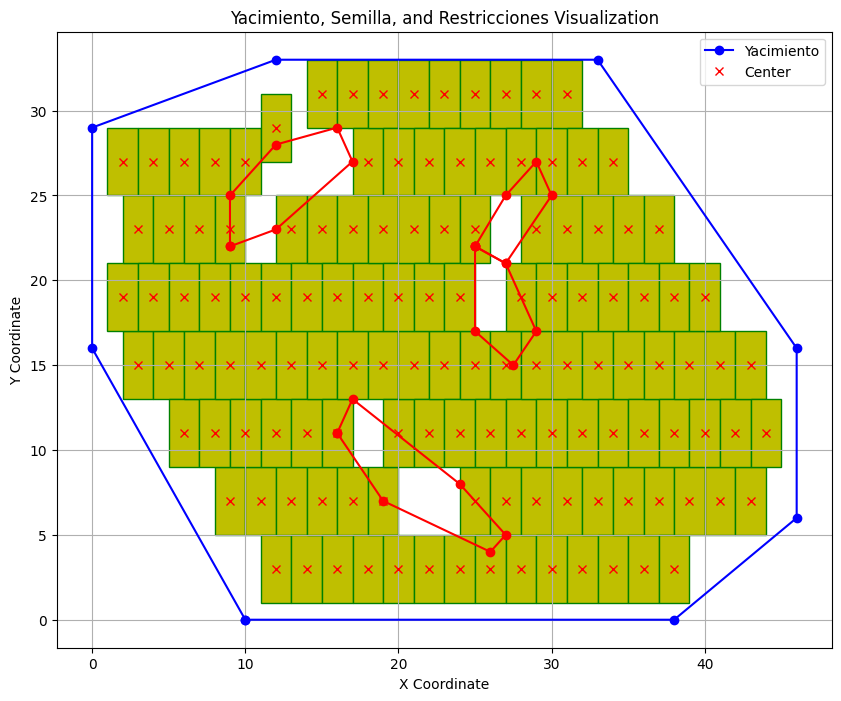

[129]
0.8065650644783119


In [ ]:
rectangles = grid_heuristic(polygon, [panel_size[1]], restrictions, rand = False)
fun_generacion_mapa(polygon,restrictions,rectangles,[panel_size[1]])
area = calculate_area(polygon,rectangles,[panel_size[1]])
print(len_rectangles)
print(area)

In [ ]:
print(area)

0.7565455255959359


In [ ]:
print(rectangles)

[[(4.5, 18.0), (11.5, 8.0), (9.5, 18.0), (16.5, 8.0), (14.5, 18.0), (17.5, 28.0), (19.5, 18.0), (22.5, 28.0), (26.5, 8.0), (24.5, 18.0), (27.5, 28.0), (31.5, 8.0), (29.5, 18.0), (36.5, 8.0), (34.5, 18.0), (42.5, 12.0)], [(3.0, 25.0), (5.0, 25.0), (7.0, 9.0), (7.0, 25.0), (9.0, 25.0), (8.0, 29.0), (10.0, 29.0), (12.0, 29.0), (14.0, 29.0), (20.0, 5.0), (22.0, 5.0), (23.0, 9.0), (31.0, 25.0), (33.0, 25.0), (32.0, 29.0), (35.0, 25.0), (39.0, 17.0), (38.0, 21.0), (40.0, 5.0), (21.0, 11.0), (41.0, 19.0)]]


In [ ]:
print(polygon)

In [ ]:
print(panel_size)


[(5.0, 10.0), (2.0, 4.0)]


In [ ]:
best_rectangles = optimize_area(grid_heuristic,polygon,rectangles,[panel_size[1]],restrictions,3, 20)
print(best_rectangles)

[131]


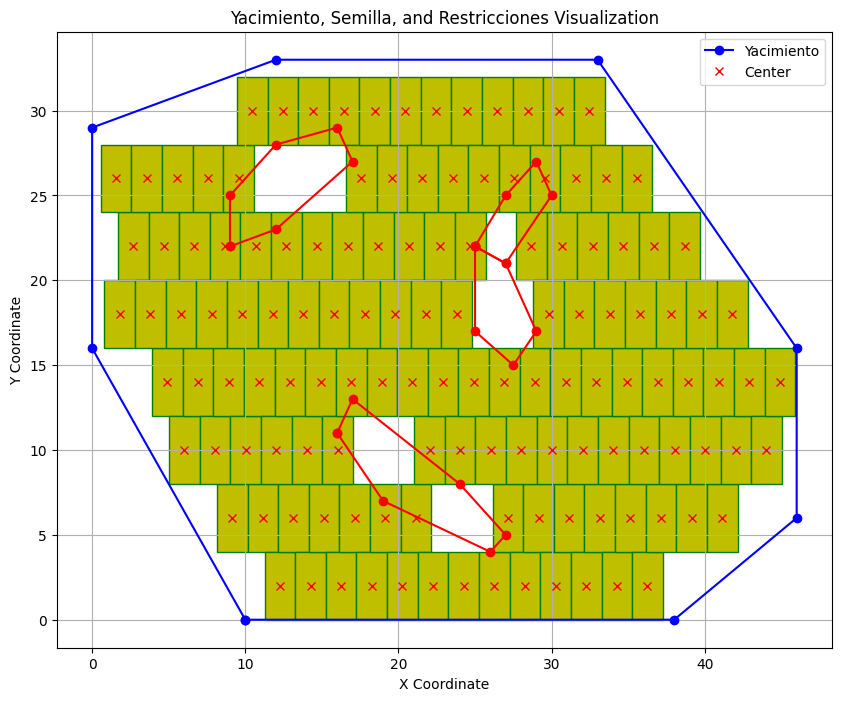

0.8190699491989059

In [9]:
len_rectangles = [len(rect) for rect in best_rectangles]
print(len_rectangles)
fun_generacion_mapa(polygon,restrictions,best_rectangles,[panel_size[1]])
calculate_area(polygon, len_rectangles, [panel_size[1]])

In [ ]:
# Corrected path to save the CSV
csv_path = r'C:\Users\valen\OneDrive\Escritorio\Bony\Di tella\TD8FINAL\TD8_ProyectoFinal\solutions\pols2\best_rectangles0.csv'

# Find the maximum length of the lists inside best_rectangles
max_length = max(len(lst) for lst in best_rectangles)

# Save best_rectangles to a CSV file
with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header: Separate 'x' and 'y' for each pair of coordinates
    header = []
    for i in range(len(best_rectangles)):
        header.append(f'x{i}')
        header.append(f'y{i}')
    writer.writerow(header)
    
    # Iterate through each "row" index up to the maximum length
    for i in range(max_length):
        row = []
        for rect_list in best_rectangles:
            if i < len(rect_list):
                row.extend([rect_list[i][0], rect_list[i][1]])  # Add x and y coordinates as floats/ints
            else:
                row.extend([None, None])  # Use None for missing values to avoid quotes
        writer.writerow(row)

In [ ]:
file_path_bony = 'C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/mapas/pol.1s.00.xml'
polygon_2, panel_size_2, restrictions_2 , angulo_2 = xml_data_extractor(file_path_bony)

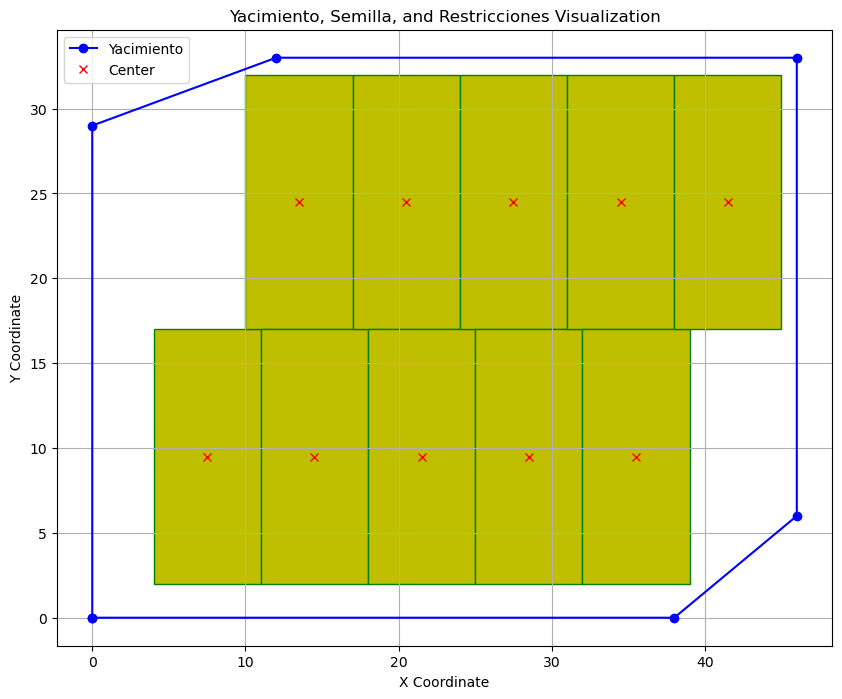

[10]
0.7142857142857143


In [ ]:
rectangles_2 = grid_heuristic(polygon_2, panel_size_2, restrictions_2, rand = False)
fun_generacion_mapa(polygon_2,restrictions_2,rectangles_2,panel_size_2)
len_rectangles_2 = [len(rect) for rect in rectangles_2]
area_2 = calculate_area(polygon_2,len_rectangles_2,panel_size_2)
print(len_rectangles_2)
print(area_2)

In [ ]:
file_path_bony = 'C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/mapas/pol.1s.01.xml'
polygon_3, panel_size_3, restrictions_3 , angulo_3 = xml_data_extractor(file_path_bony)

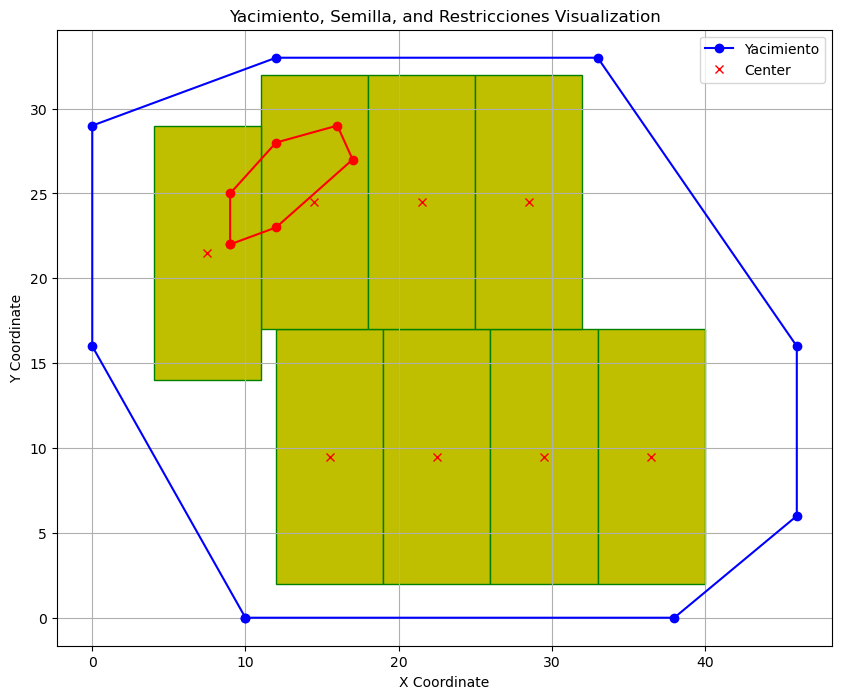

[8]
0.6565064478311841


In [ ]:
rectangles_3 = grid_heuristic(polygon_3, panel_size_3, restrictions_3, rand = False)
fun_generacion_mapa(polygon_3,restrictions_3,rectangles_3,panel_size_3)
len_rectangles_3 = [len(rect) for rect in rectangles_3]
area_3 = calculate_area(polygon_3,len_rectangles_3,panel_size_3)
print(len_rectangles_3)
print(area_3)

In [ ]:
file_path_bony = 'C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/mapas/pol.s2.07.xml'
polygon_4, panel_size_4, restrictions_4 , angulo_4 = xml_data_extractor(file_path_bony)

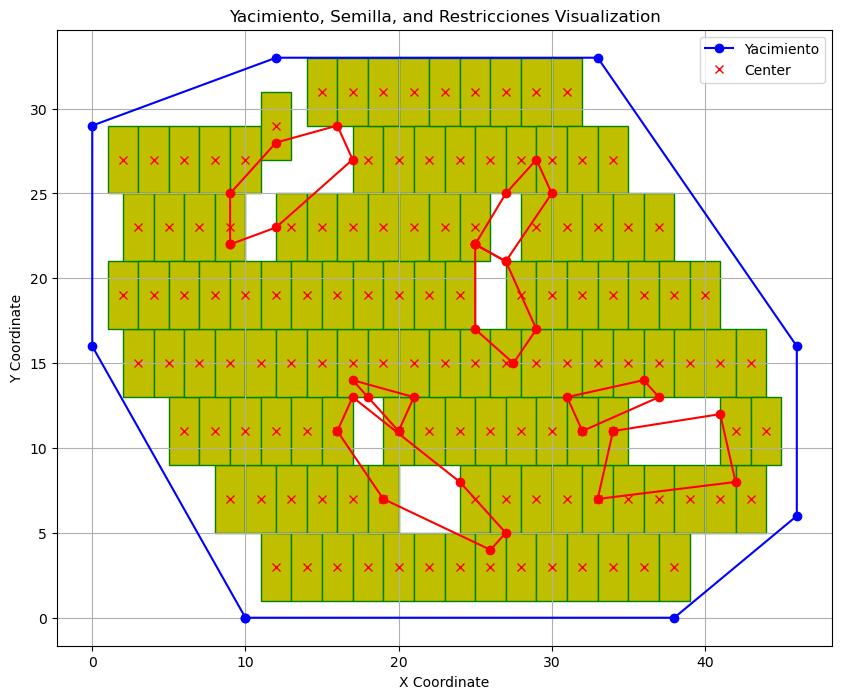

[126]
0.7878077373974208


In [ ]:
rectangles_4 = grid_heuristic(polygon_4, panel_size_4, restrictions_4, rand = False)
fun_generacion_mapa(polygon_4,restrictions_4,rectangles_4,panel_size_4)
len_rectangles_4 = [len(rect) for rect in rectangles_4]
area_4 = calculate_area(polygon_4,len_rectangles_4,panel_size_4)
print(len_rectangles_4)
print(area_4)

In [ ]:
file_path_bony = 'C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/mapas/pol.02.xml'
polygon_5, panel_size_5, restrictions_5 , angulo_5 = xml_data_extractor(file_path_bony)

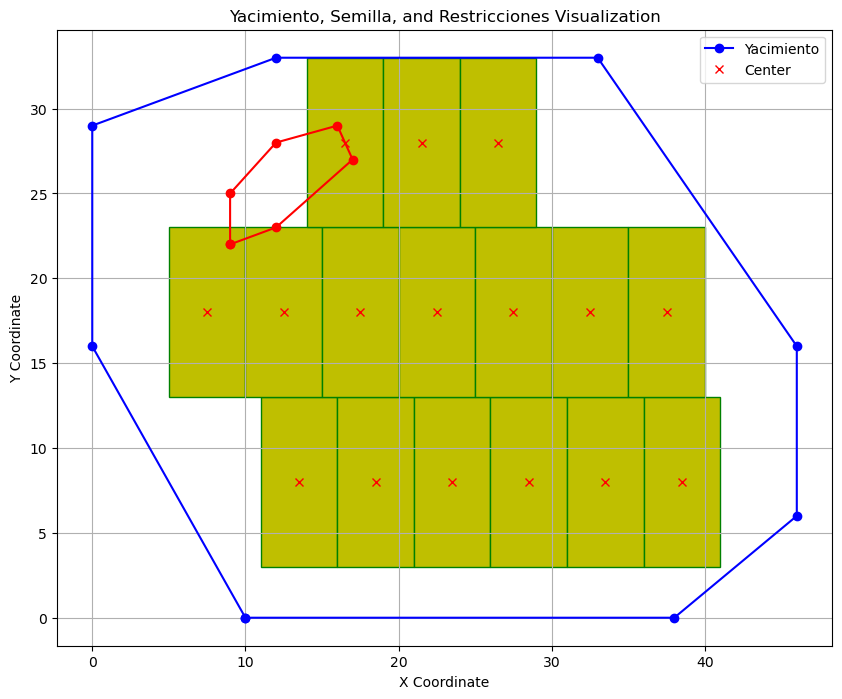

[16]
0.6252442360296991


In [ ]:
rectangles_5 = grid_heuristic(polygon_5, panel_size_5, restrictions_5, rand = False)
fun_generacion_mapa(polygon_5,restrictions_5,rectangles_5,panel_size_5)
len_rectangles_5 = [len(rect) for rect in rectangles_5]
area_5 = calculate_area(polygon_5,len_rectangles_5,panel_size_5)
print(len_rectangles_5)
print(area_5)

In [ ]:
file_path_bony = 'C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/mapas/test.01.xml'
polygon_6, panel_size_6, restrictions_6 , angulo_6 = xml_data_extractor(file_path_bony)

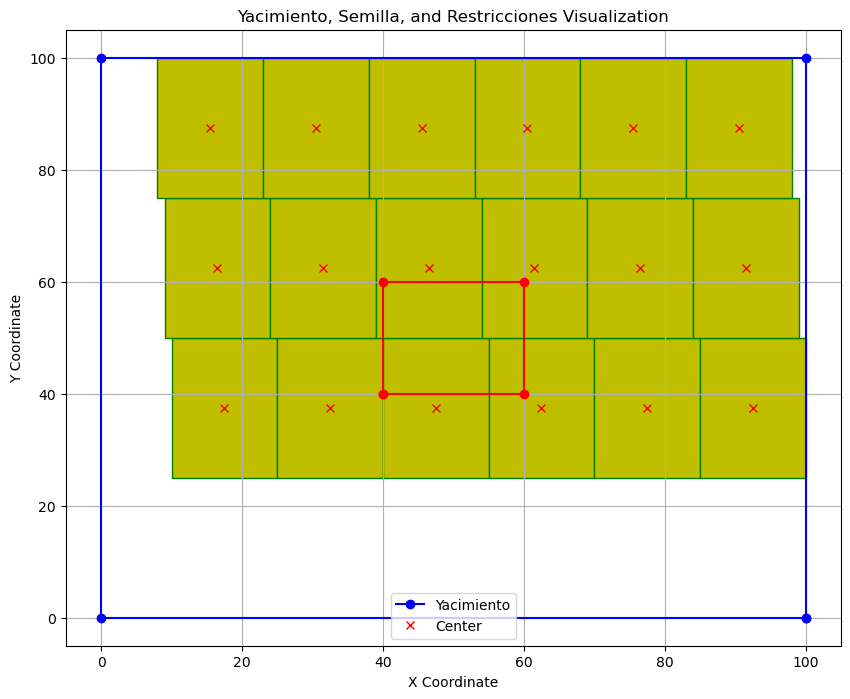

[18]
0.675


In [ ]:
rectangles_6 = grid_heuristic(polygon_6, panel_size_6, restrictions_6, rand = False)
fun_generacion_mapa(polygon_6,restrictions_6,rectangles_6,panel_size_6)
len_rectangles_6 = [len(rect) for rect in rectangles_6]
area_6 = calculate_area(polygon_6,len_rectangles_6,panel_size_6)
print(len_rectangles_6)
print(area_6)

In [ ]:
file_path_bony = 'C:/Users/valen/OneDrive/Escritorio/Bony/Di tella/TD8FINAL/TD8_ProyectoFinal/mapas/test.02.xml'
polygon_7, panel_size_7, restrictions_7 , angulo_7 = xml_data_extractor(file_path_bony)

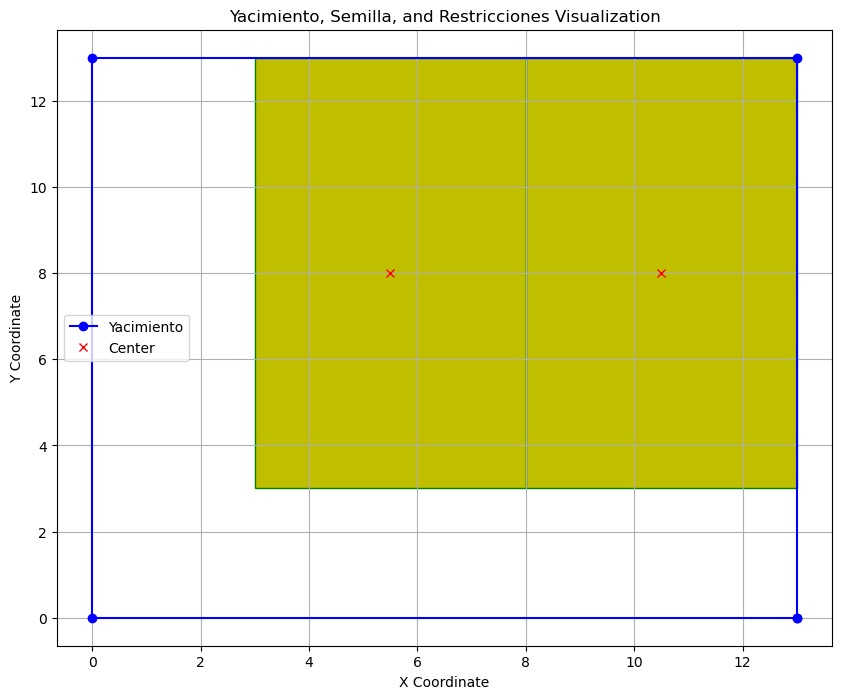

[2]
0.591715976331361


In [ ]:
rectangles_7 = grid_heuristic(polygon_7, panel_size_7, restrictions_7, rand = False)
fun_generacion_mapa(polygon_7,restrictions_7,rectangles_7,panel_size_7)
len_rectangles_7 = [len(rect) for rect in rectangles_7]
area_7 = calculate_area(polygon_7,len_rectangles_7,panel_size_7)
print(len_rectangles_7)
print(area_7)